# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
m=3
c=5
x=np.random.randint(20,90,100)
y=m*x+c
y=y+np.random.normal(0,10,100)
df=pd.DataFrame({'x':x,'y':y})
df.head()

,x,y
0,81,255.116917
1,83,239.423231
2,63,203.337267
3,67,212.739091
4,28,92.139412


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df['y'], random_state=42)
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)
y_pred=lin_reg.predict(X_test)
y_pred_train=lin_reg.predict(X_train)
print("mae test",mean_absolute_error(y_test,y_pred))
print("mae train",mean_absolute_error(y_train,y_pred_train))
print("mse test",mean_squared_error(y_test,y_pred))
print("mse train",mean_squared_error(y_train,y_pred_train))
print("r2 test",r2_score(y_test,y_pred))
print("r2 train",r2_score(y_train,y_pred_train))

[2.98551767]
4.276322422313001
mae test 7.767937513654058
mae train 8.009051348064357
mse test 98.14517842771126
mse train 104.80678876225527
r2 test 0.9789368346355206
r2 train 0.9644037157304537


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df['y'],test_size=0.2 ,random_state=42,shuffle=True)
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)
y_pred=lin_reg.predict(X_test)
y_pred_train=lin_reg.predict(X_train)
print("mae test",mean_absolute_error(y_test,y_pred))
print("mae train",mean_absolute_error(y_train,y_pred_train))
print("mse test",mean_squared_error(y_test,y_pred))
print("mse train",mean_squared_error(y_train,y_pred_train))
print("r2 test",r2_score(y_test,y_pred))
print("r2 train",r2_score(y_train,y_pred_train))

[2.96523934]
5.3203820146509315
mae test 8.51312906846022
mae train 7.826177638662162
mse test 115.99993191475703
mse train 100.49778548981445
r2 test 0.9745818466078143
r2 train 0.9676375656789186


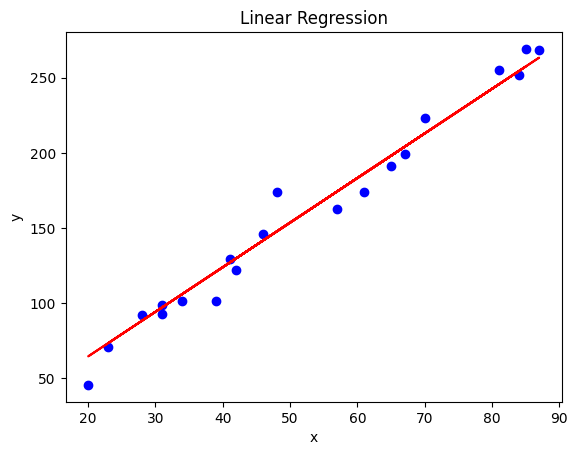

In [5]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,y_pred,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

# **The evaluation values are very close between the test and the training, and there is no overfitting or underfitting. The model in general works very well, even as shown in the chart.**

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [6]:
a1=5
a2=3
c=2
x1=np.linspace(20,90,100)
x2=np.random.randint(20,90,100)
y=a1*x1+a2*x2+c
y=y+np.random.normal(0,10,100)
df=pd.DataFrame({'x1':x1,'x2':x2,'y':y})
df.head()

,x1,x2,y
0,20.000000,57,274.203217
1,20.707071,63,298.063003
2,21.414141,83,359.000271
3,22.121212,57,270.242961
4,22.828283,22,184.596680


In [7]:
X=df[['x1','x2']]
y=df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
print("weghit after GD",lin_reg.coef_)
print("weghit before GD",a1,a2)
print("bais after GD",lin_reg.intercept_)
print("bais before GD",c)
y_pred=lin_reg.predict(X_test)
y_pred_train=lin_reg.predict(X_train)
print("mae test",mean_absolute_error(y_test,y_pred))
print("mae train",mean_absolute_error(y_train,y_pred_train))
print("mse test",mean_squared_error(y_test,y_pred))
print("mse train",mean_squared_error(y_train,y_pred_train))
print("r2 test",r2_score(y_test,y_pred))
print("r2 train",r2_score(y_train,y_pred_train))

weghit after GD [4.96572821 2.96469934]
weghit before GD 5 3
bais after GD 7.280087604986647
bais before GD 2
mae test 8.500399850080962
mae train 7.783836215858433
mse test 127.86508800873119
mse train 94.28060363937118
r2 test 0.9927884164928921
r2 train 0.9925368261195309


# **The model works very efficiently and there are no problems. The weight values, based on the GD step, are  Change up and down from original values.**

# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [9]:
a=7
b=3
c=2
x=np.random.randint(20,90,100)
y=a*x**2+b*x+c
y=y+np.random.normal(0,10,100)
df=pd.DataFrame({'x':x,'y':y})
df.head()

,x,y
0,76,40662.801126
1,66,30700.183196
2,86,52022.843266
3,31,6806.560817
4,76,40664.874192


In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X=poly.fit_transform(df[['x']])
y=df['y']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [12]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)
y_pred_train=lin_reg.predict(X_train)
print("mae test",mean_absolute_error(y_test,y_pred))
print("mae train",mean_absolute_error(y_train,y_pred_train))
print("mse test",mean_squared_error(y_test,y_pred))
print("mse train",mean_squared_error(y_train,y_pred_train))
print("r2 test",r2_score(y_test,y_pred))
print("r2 train",r2_score(y_train,y_pred_train))

mae test 9.041612873770145
mae train 7.844196663429415
mse test 129.76824351492465
mse train 90.57615134672906
r2 test 0.999999305223326
r2 train 0.9999995720153187


# **The model, like the previous ones, works efficiently after converting its rate to a linear form, and there is no overfitting.**

# used both randint and linspace to generate different X values and test the models on various

# *--------------------------------------------------------------------------------------------**

## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [13]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airlines-flights-data


In [14]:
os.listdir(path)

['airlines_flights_data.csv']

In [15]:
full_path = os.path.join(path,os.listdir(path)[0])

## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*


# **Import Libraries**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler,OneHotEncoder,OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_regression

# **Read Data**

In [17]:
df = pd.read_csv(full_path)

# **Data Cleaning And EDA**

## **Understand data**

In [18]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [20]:
print(f"shape of data: {df.shape}")
print(f"columns: {df.shape[1]}")
print(f"rows: {df.shape[0]}")

shape of data: (300153, 12)
columns: 12
rows: 300153


## **Clean Data**

In [21]:
df.isna().sum().reset_index().rename(columns={'index':'column',0:'missing_values'}).sort_values(by='missing_values',ascending=False)

,column,missing_values
0,index,0
1,airline,0
2,flight,0
3,source_city,0
4,departure_time,0
5,stops,0
6,arrival_time,0
7,destination_city,0
8,class,0
9,duration,0


In [22]:
if df.duplicated().sum()>0:
    df.drop_duplicates(inplace=True)

In [23]:
print(f"num of dublicate rows = {df.duplicated().sum().sum()}")

num of dublicate rows = 0


In [24]:
df.drop(['index','flight'],axis=1,inplace=True)

In [25]:
cat_cols=df.select_dtypes(include='object').columns
num_cols=df.select_dtypes(exclude='object').columns

# **Analyze and discover relationships between num data**

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [27]:
sns.set_style('darkgrid')
def visula_numcol(df,num_cols):
 for col in num_cols:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

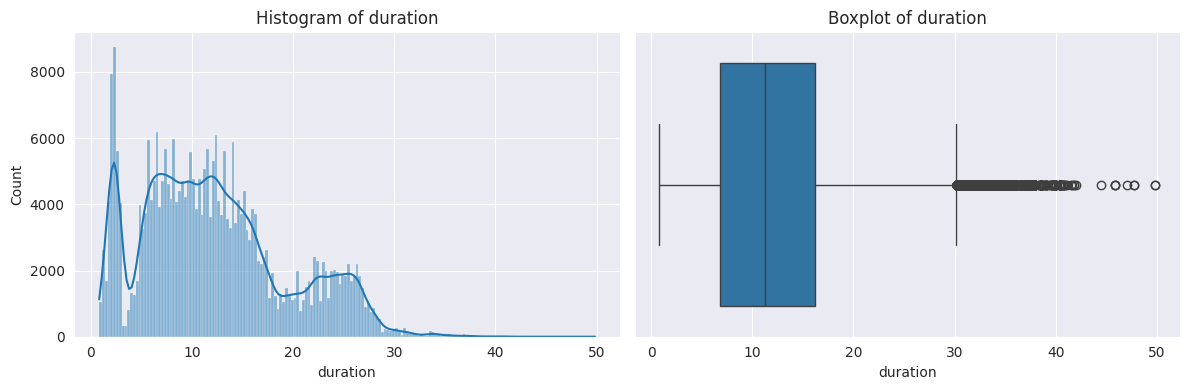

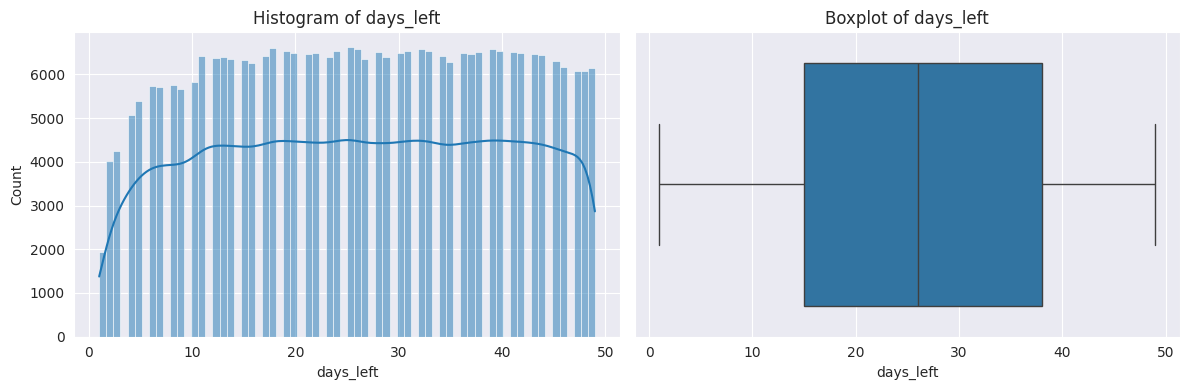

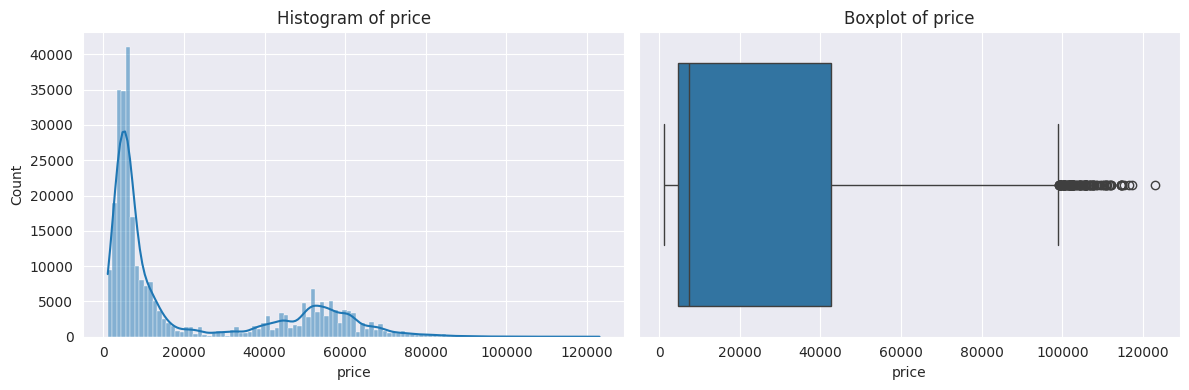

In [28]:
visula_numcol(df,num_cols)

In [29]:
duration_class=df.groupby('class')['duration'].mean().reset_index()

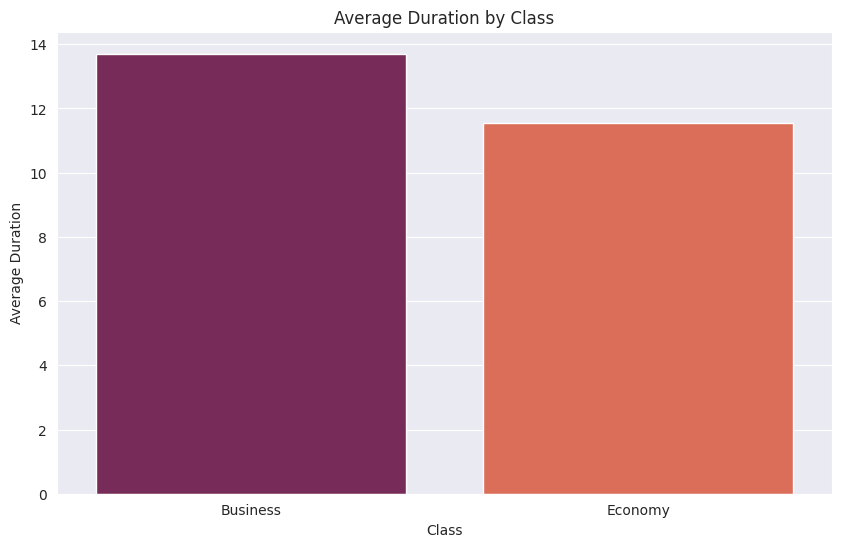

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(data=duration_class, x='class', y='duration', palette='rocket')
plt.title('Average Duration by Class')
plt.xlabel('Class')
plt.ylabel('Average Duration')
plt.show()

## **It seems that business class people take longer on their trips.**

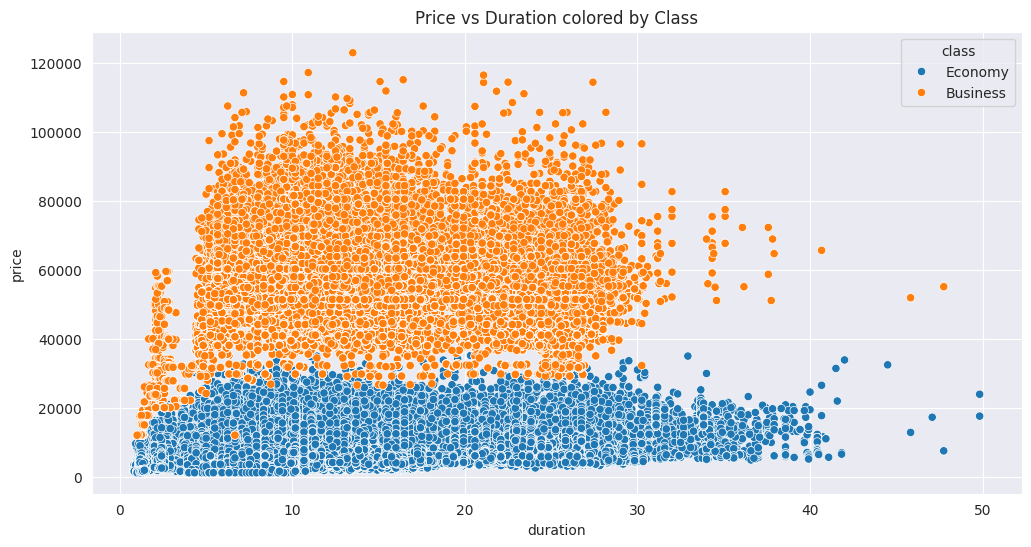

In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='duration', y='price', hue='class')
plt.title('Price vs Duration colored by Class')
plt.show()

## **It seems that the average price of flights for business class passengers is much higher than for regular passengers.**

In [32]:
def handle_outlier(df, num_cols):
 outlier_report = []
 for col in num_cols:
   if col!='price':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        n_outliers = outliers.shape[0]

        outlier_report.append({
            'column': col,
            'outliers_found': n_outliers,
            'lower_bound': lower,
            'upper_bound': upper
        })

        median = df[col].median()
        df[col] = np.where((df[col] < lower) | (df[col] > upper), median, df[col])

 report_df = pd.DataFrame(outlier_report)
 return  report_df

In [33]:
handle_outlier(df,num_cols)

,column,outliers_found,lower_bound,upper_bound
0,duration,2110,-7.18,30.18
1,days_left,0,-19.50,72.50


In [34]:
df['duration']=np.log1p(df['duration'])

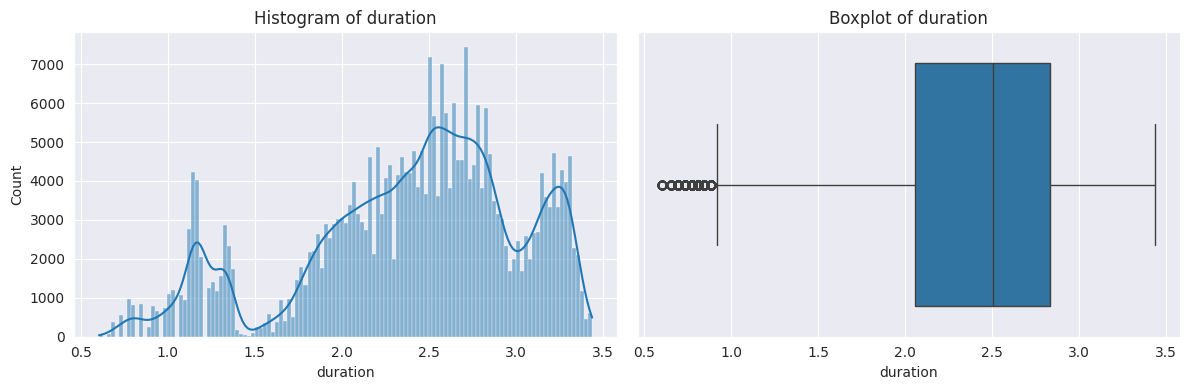

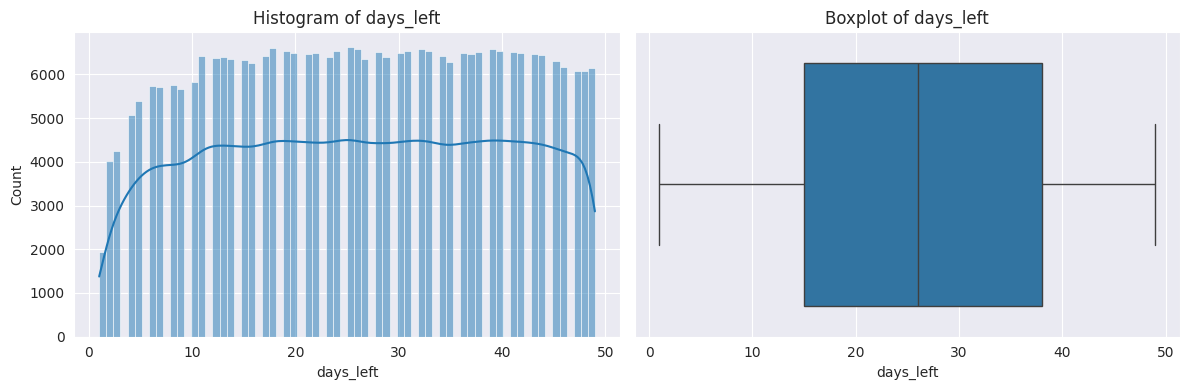

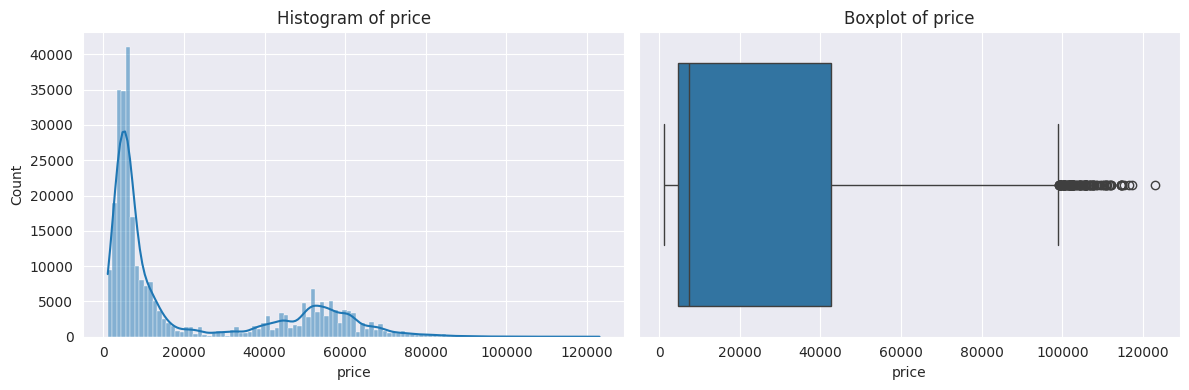

In [35]:
visula_numcol(df,num_cols)

### **The distribution has become normal in the duration column.**

# **Analyze and discover relationships between cat data**

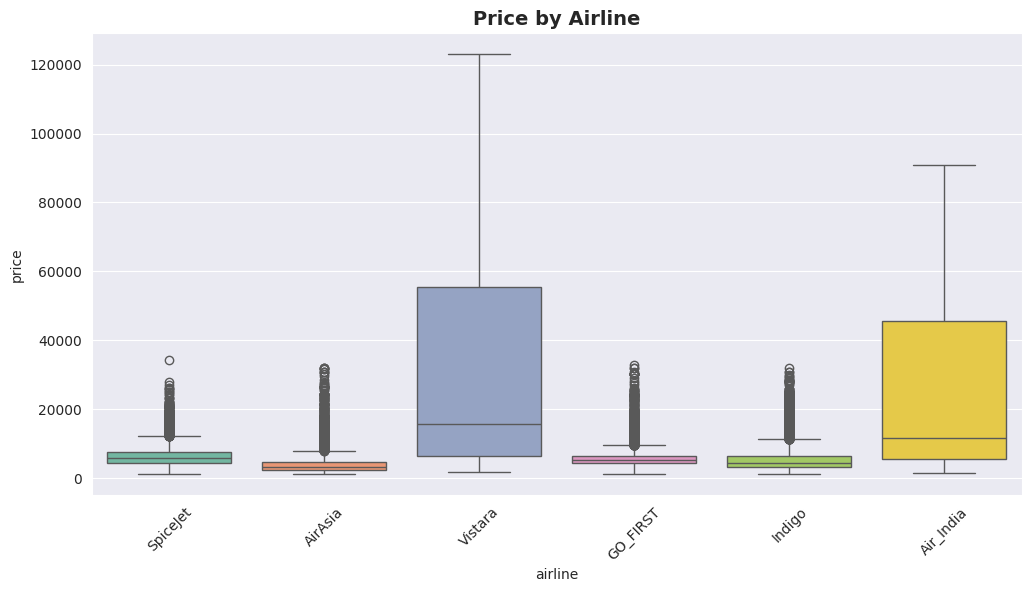

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="airline", y="price", data=df, palette="Set2")
plt.title("Price by Airline", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

# **Vistara is the country that flies the most and Air India is close to it, but noticeably far from the rest.**

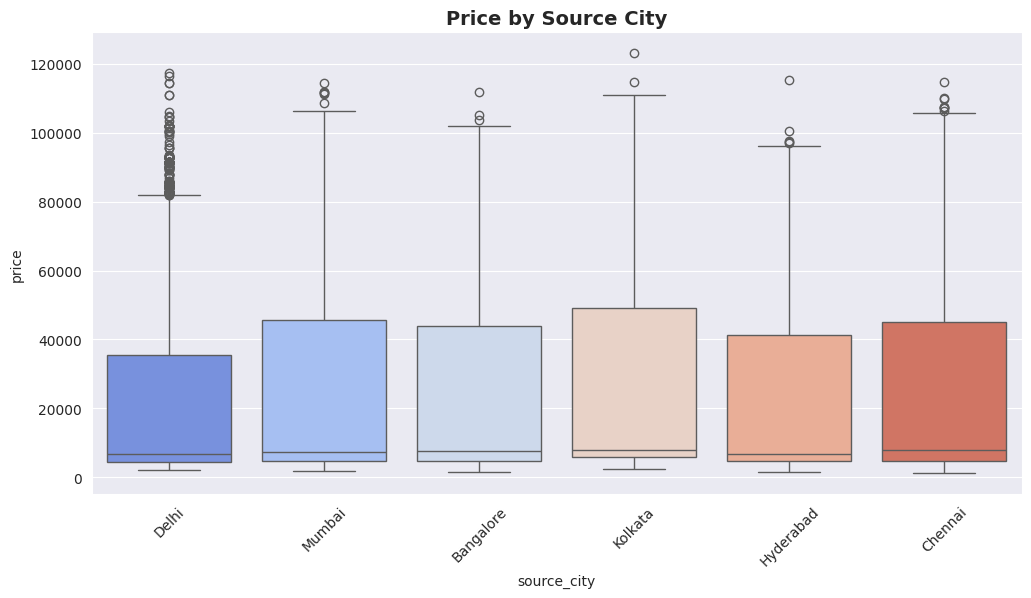

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="source_city", y="price", data=df, palette="coolwarm")
plt.title("Price by Source City", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

### **Kolkata and Mumbai are the two cities where people travel and pay the highest prices..**

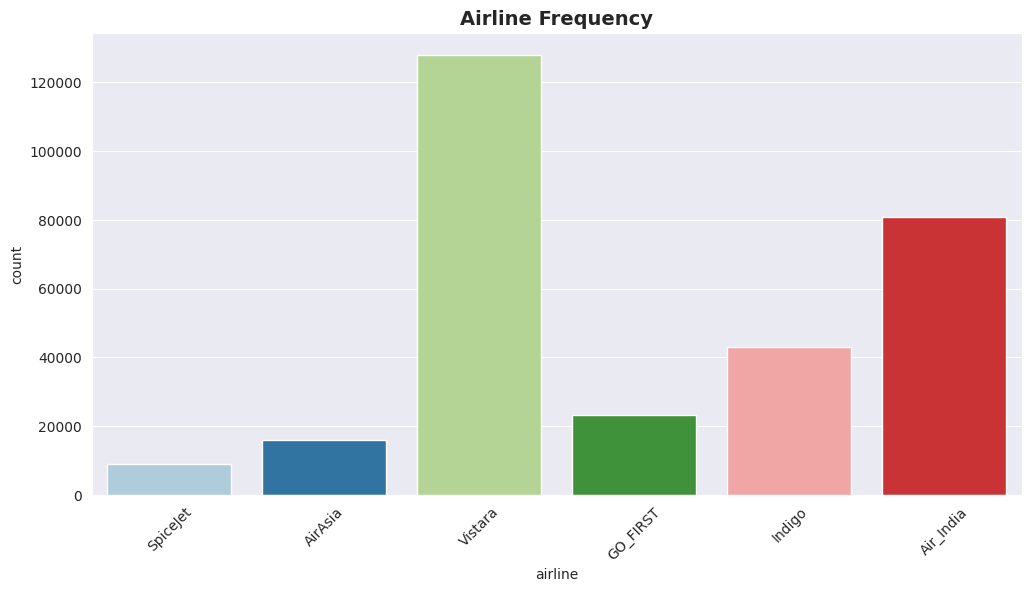

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x="airline", data=df, palette="Paired")
plt.title("Airline Frequency", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

### **Kolkata and Mumbai are the two cities where people travel the most**

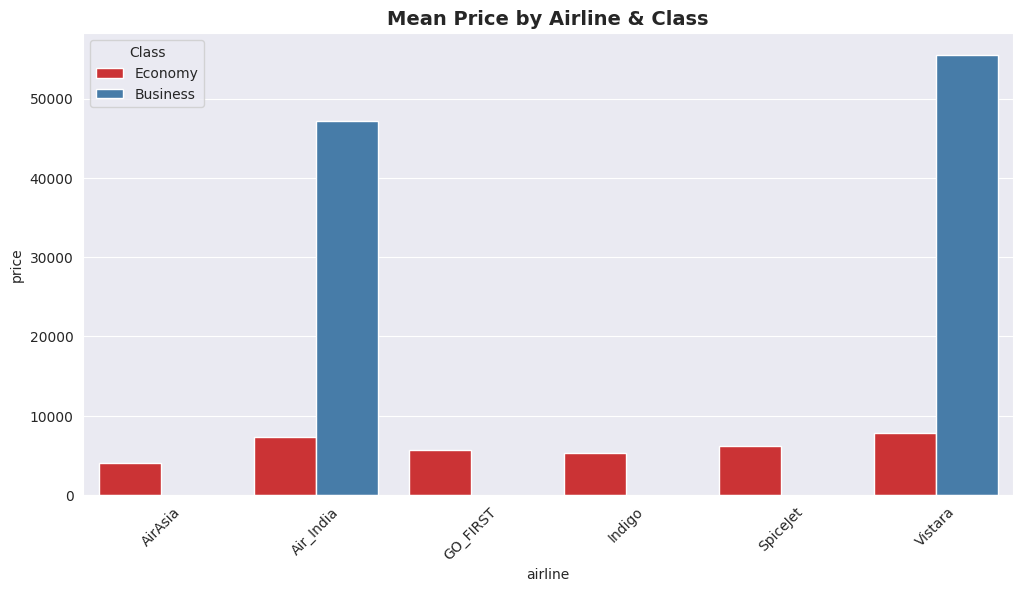

In [39]:
plt.figure(figsize=(12, 6))
grouped = df.groupby(["airline", "class"])["price"].mean().reset_index()
sns.barplot(x="airline", y="price", hue="class", data=grouped, palette="Set1")
plt.title("Mean Price by Airline & Class", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.legend(title="Class")
plt.show()

### **Business Class seems to be more popular in Air India and Vistara and is considered non-existent in the rest.**

# **Mix relationships between the Target column and data in general**

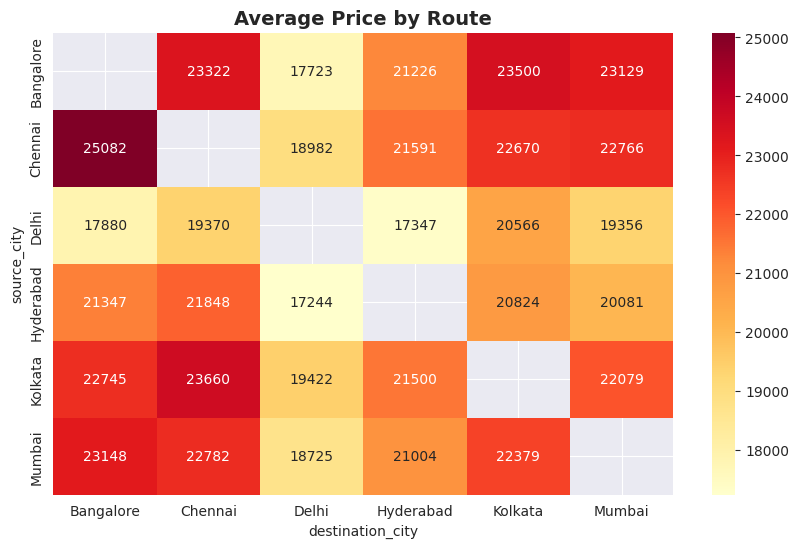

In [40]:
pivot_city = df.pivot_table(values="price", index="source_city", columns="destination_city", aggfunc="mean")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_city, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Average Price by Route", fontsize=14, fontweight="bold")
plt.show()

## Between Chennai and Bangalore, there is a very strong relationship, indicating it is the most expensive route.

##The relationship between Kolkata and Chennai is also very strong, making it one of the most expensive routes.

##There is a strong relationship from Bangalore to Chennai, which is also a high-priced route.

##The route from Mumbai to Bangalore also shows a strong relationship.

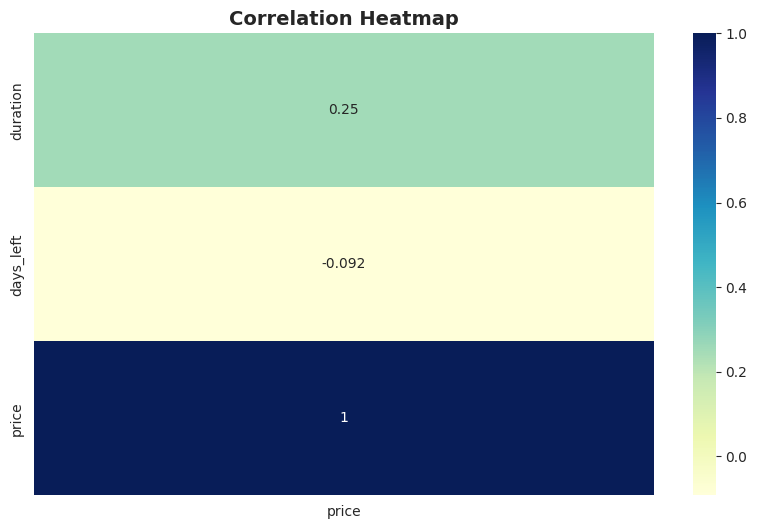

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr()[['price']], annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()

## **It seems that the digital columns have a very weak correlation with the target.**

In [42]:
df.drop(['days_left','duration'],axis=1,inplace=True)

# Data preproceesing

In [43]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops: ['zero' 'one' 'two_or_more']
arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class: ['Economy' 'Business']
price: [ 5953  5956  5955 ... 87051 74731 77105]


In [44]:
ordinal_cols = {
    "departure_time": ["Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night"],
    "arrival_time": ["Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night"],
    "stops": ["zero", "one", "two_or_more"],
    "class": ["Economy", "Business"]
}
encoder = OrdinalEncoder(categories=list(ordinal_cols.values()))

df[list(ordinal_cols.keys())] = encoder.fit_transform(df[list(ordinal_cols.keys())])


In [45]:
X=df.drop('price',axis=1)
y=df['price']

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [47]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (240122, 7)
X_test shape: (60031, 7)
y_train shape: (240122,)
y_test shape: (60031,)


In [48]:
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns
scaler=RobustScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# **Future Selection**

In [49]:
mi_scores = mutual_info_regression(X_train_transformed, y_train)
mi_scores = pd.Series(mi_scores).sort_values(ascending=False)
top_indices = mi_scores.head(10).index
X_train_selected = X_train_transformed[:, top_indices]
X_test_selected = X_test_transformed[:, top_indices]

In [50]:
print(f"X_train_selected shape: {X_train_selected.shape}")
print(f"X_test_selected shape: {X_test_selected.shape}")

X_train_selected shape: (240122, 10)
X_test_selected shape: (60031, 10)


In [52]:

models = {
    'LinearRegression': (
        LinearRegression(),
        {'fit_intercept': [True, False]}
    ),

    'RandomForestRegressor': (
        RandomForestRegressor(random_state=42),
        {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    ),

    'XGBRegressor': (
        XGBRegressor(random_state=42, eval_metric='rmse'),
        {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 6, 10],
            'learning_rate': [0.1, 0.05, 0.01]
        }
    )
}

best_models = {}

for name, (model, params) in models.items():
    print(f"\n Running RandomizedSearch for {name}")
    search = RandomizedSearchCV(
        model,
        params,
        n_iter=5,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        random_state=42
    )
    search.fit(X_train_transformed, y_train)

    best_model = search.best_estimator_
    best_models[name] = best_model

    y_pred_train = best_model.predict(X_train_transformed)
    y_pred_test = best_model.predict(X_test_transformed)

    print(f"Best Params: {search.best_params_}")
    print(f"Best CV R²: {search.best_score_:.4f}")
    print(f"R² Train: {r2_score(y_train, y_pred_train):.4f}")
    print(f"R² Test: {r2_score(y_test, y_pred_test):.4f}")


 Running RandomizedSearch for LinearRegression
Best Params: {'fit_intercept': False}
Best CV R²: 0.9033
R² Train: 0.9033
R² Test: 0.9030

 Running RandomizedSearch for RandomForestRegressor
Best Params: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': None}
Best CV R²: 0.9596
R² Train: 0.9612
R² Test: 0.9591

 Running RandomizedSearch for XGBRegressor
Best Params: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
Best CV R²: 0.9597
R² Train: 0.9612
R² Test: 0.9591


In [53]:
model=best_models['XGBRegressor']
model.fit(X_train_transformed,y_train)
y_pred=model.predict(X_test_transformed)
y_pred_train=model.predict(X_train_transformed)
print(f"R² Train: {r2_score(y_train, y_pred_train):.4f}")
print(f"R² Test: {r2_score(y_test, y_pred):.4f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_pred_train):.4f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE Train: {mean_squared_error(y_train, y_pred_train):.4f}")
print(f"MSE Test: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE Train: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")
print(f"RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

R² Train: 0.9612
R² Test: 0.9591
MAE Train: 2864.4368
MAE Test: 2926.7947
MSE Train: 19989168.0000
MSE Test: 21087462.0000
RMSE Train: 4470.9247
RMSE Test: 4592.1087
